# DNN - UNSW

In [1]:
cd C:\\Users\\Sharuka Thirimanne\\Desktop\\FYP-ML-IDS

C:\Users\Sharuka Thirimanne\Desktop\FYP-ML-IDS


In [2]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from sklearn.decomposition import PCA
from tensorflow.keras import regularizers
from tensorflow.keras import Model, layers
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix,f1_score


c:\users\sharuka thirimanne\appdata\local\programs\python\python37\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\sharuka thirimanne\appdata\local\programs\python\python37\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\sharuka thirimanne\appdata\local\programs\python\python37\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint

In [3]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [4]:
def load_train_dataset():
    df_train = pd.read_csv('USNW_train-set.csv')

    limit1 = df_train.shape[1]-1
    
    X_train = df_train.iloc[:,0:limit1]
    Y_train = df_train.iloc[:,limit1]
    
    return  X_train, Y_train,  df_train

X_train, Y_train,  df_train = load_train_dataset()

In [5]:
def load_test_dataset():
    df_test = pd.read_csv('USNW_test-set.csv')
    
    limit2 = df_test.shape[1]-1
    
    X_test = df_test.iloc[:,0:limit2]
    Y_test = df_test.iloc[:,limit2]
    
    return X_test, Y_test,df_test

X_test, Y_test ,df_test = load_test_dataset()

In [6]:
METRICS = [ 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

In [7]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='accuracy', 
    verbose=1,
    patience=5,
    mode='max',
    min_delta = 0.0001,
    restore_best_weights=True)

In [8]:
def neural_network():
    #Neural Network Model
    model = Sequential()
    model.add(Dense(256, input_dim=65, activation='relu',kernel_initializer='glorot_uniform',bias_initializer='zeros'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='sgd', metrics = METRICS)
    
    return model


In [9]:
estimator = KerasClassifier(build_fn=neural_network)
estimator.fit(X_train,Y_train,verbose=1,callbacks=[early_stopping], epochs=200,validation_split=0.1,batch_size=64)

Train on 88480 samples, validate on 9832 samples
Epoch 1/200
88480/88480 [==============================] - 13s 146us/step - loss: 0.5000 - accuracy: 0.6231 - precision: 0.7005 - recall: 0.2158 - auc: 0.7409 - val_loss: 0.2290 - val_accuracy: 0.7525 - val_precision: 0.8171 - val_recall: 0.6131 - val_auc: 0.8762
Epoch 2/200
88480/88480 [==============================] - 12s 137us/step - loss: 0.2548 - accuracy: 0.8002 - precision: 0.8288 - recall: 0.7412 - auc: 0.9014 - val_loss: 0.6438 - val_accuracy: 0.8173 - val_precision: 0.8276 - val_recall: 0.7894 - val_auc: 0.9083
Epoch 3/200
88480/88480 [==============================] - 12s 137us/step - loss: 0.2333 - accuracy: 0.8236 - precision: 0.8285 - recall: 0.8075 - auc: 0.9122 - val_loss: 0.1098 - val_accuracy: 0.8371 - val_precision: 0.8321 - val_recall: 0.8377 - val_auc: 0.9223
Epoch 4/200
88480/88480 [==============================] - 12s 138us/step - loss: 0.2226 - accuracy: 0.8462 - precision: 0.8356 - recall: 0.8568 - auc: 0.9292 

Epoch 32/200
88480/88480 [==============================] - 12s 138us/step - loss: 0.1980 - accuracy: 0.8956 - precision: 0.8641 - recall: 0.9385 - auc: 0.9658 - val_loss: 0.1964 - val_accuracy: 0.8956 - val_precision: 0.8642 - val_recall: 0.9384 - val_auc: 0.9658
Epoch 33/200
88480/88480 [==============================] - 12s 141us/step - loss: 0.1976 - accuracy: 0.8957 - precision: 0.8644 - recall: 0.9383 - auc: 0.9659 - val_loss: 0.1865 - val_accuracy: 0.8958 - val_precision: 0.8646 - val_recall: 0.9383 - val_auc: 0.9660
Epoch 34/200
88480/88480 [==============================] - 13s 144us/step - loss: 0.1973 - accuracy: 0.8959 - precision: 0.8647 - recall: 0.9383 - auc: 0.9660 - val_loss: 0.1319 - val_accuracy: 0.8960 - val_precision: 0.8648 - val_recall: 0.9384 - val_auc: 0.9661
Epoch 35/200
88480/88480 [==============================] - 12s 141us/step - loss: 0.1969 - accuracy: 0.8961 - precision: 0.8650 - recall: 0.9384 - auc: 0.9662 - val_loss: 0.1109 - val_accuracy: 0.8963 - v

Epoch 63/200
88480/88480 [==============================] - 13s 148us/step - loss: 0.1916 - accuracy: 0.9008 - precision: 0.8719 - recall: 0.9395 - auc: 0.9697 - val_loss: 0.1904 - val_accuracy: 0.9009 - val_precision: 0.8720 - val_recall: 0.9394 - val_auc: 0.9697
Epoch 64/200
88480/88480 [==============================] - 13s 148us/step - loss: 0.1918 - accuracy: 0.9009 - precision: 0.8721 - recall: 0.9393 - auc: 0.9697 - val_loss: 0.1916 - val_accuracy: 0.9009 - val_precision: 0.8722 - val_recall: 0.9393 - val_auc: 0.9697
Epoch 65/200
88480/88480 [==============================] - 13s 147us/step - loss: 0.1909 - accuracy: 0.9009 - precision: 0.8723 - recall: 0.9392 - auc: 0.9698 - val_loss: 0.1177 - val_accuracy: 0.9010 - val_precision: 0.8724 - val_recall: 0.9392 - val_auc: 0.9698
Epoch 66/200
88480/88480 [==============================] - 13s 148us/step - loss: 0.1909 - accuracy: 0.9011 - precision: 0.8725 - recall: 0.9392 - auc: 0.9698 - val_loss: 0.1087 - val_accuracy: 0.9011 - v

Epoch 94/200
88480/88480 [==============================] - 12s 131us/step - loss: 0.1866 - accuracy: 0.9032 - precision: 0.8775 - recall: 0.9371 - auc: 0.9715 - val_loss: 0.0934 - val_accuracy: 0.9033 - val_precision: 0.8776 - val_recall: 0.9371 - val_auc: 0.9715
Epoch 95/200
88480/88480 [==============================] - 12s 131us/step - loss: 0.1862 - accuracy: 0.9033 - precision: 0.8777 - recall: 0.9371 - auc: 0.9716 - val_loss: 0.0928 - val_accuracy: 0.9034 - val_precision: 0.8778 - val_recall: 0.9371 - val_auc: 0.9716
Epoch 96/200
88480/88480 [==============================] - 12s 131us/step - loss: 0.1860 - accuracy: 0.9034 - precision: 0.8779 - recall: 0.9371 - auc: 0.9716 - val_loss: 0.1378 - val_accuracy: 0.9035 - val_precision: 0.8780 - val_recall: 0.9371 - val_auc: 0.9717
Epoch 97/200
88480/88480 [==============================] - 12s 133us/step - loss: 0.1861 - accuracy: 0.9035 - precision: 0.8781 - recall: 0.9371 - auc: 0.9717 - val_loss: 0.1636 - val_accuracy: 0.9035 - v

Epoch 125/200
88480/88480 [==============================] - 12s 134us/step - loss: 0.1822 - accuracy: 0.9053 - precision: 0.8823 - recall: 0.9353 - auc: 0.9730 - val_loss: 0.1688 - val_accuracy: 0.9053 - val_precision: 0.8824 - val_recall: 0.9352 - val_auc: 0.9730
Epoch 126/200
88480/88480 [==============================] - 12s 134us/step - loss: 0.1820 - accuracy: 0.9054 - precision: 0.8825 - recall: 0.9352 - auc: 0.9730 - val_loss: 0.2292 - val_accuracy: 0.9054 - val_precision: 0.8825 - val_recall: 0.9351 - val_auc: 0.9730
Epoch 127/200
88480/88480 [==============================] - 12s 134us/step - loss: 0.1820 - accuracy: 0.9053 - precision: 0.8826 - recall: 0.9350 - auc: 0.9730 - val_loss: 0.1769 - val_accuracy: 0.9054 - val_precision: 0.8827 - val_recall: 0.9349 - val_auc: 0.9730
Epoch 128/200
88480/88480 [==============================] - 12s 135us/step - loss: 0.1817 - accuracy: 0.9054 - precision: 0.8827 - recall: 0.9349 - auc: 0.9730 - val_loss: 0.1044 - val_accuracy: 0.9054

Epoch 156/200
88480/88480 [==============================] - 12s 132us/step - loss: 0.1783 - accuracy: 0.9067 - precision: 0.8862 - recall: 0.9333 - auc: 0.9740 - val_loss: 0.1297 - val_accuracy: 0.9068 - val_precision: 0.8863 - val_recall: 0.9333 - val_auc: 0.9740
Epoch 157/200
88480/88480 [==============================] - 12s 131us/step - loss: 0.1791 - accuracy: 0.9068 - precision: 0.8863 - recall: 0.9332 - auc: 0.9740 - val_loss: 0.1274 - val_accuracy: 0.9068 - val_precision: 0.8864 - val_recall: 0.9332 - val_auc: 0.9740
Epoch 158/200
88480/88480 [==============================] - 12s 132us/step - loss: 0.1783 - accuracy: 0.9068 - precision: 0.8864 - recall: 0.9332 - auc: 0.9740 - val_loss: 0.2298 - val_accuracy: 0.9068 - val_precision: 0.8865 - val_recall: 0.9331 - val_auc: 0.9740
Epoch 159/200
88480/88480 [==============================] - 12s 131us/step - loss: 0.1779 - accuracy: 0.9068 - precision: 0.8865 - recall: 0.9330 - auc: 0.9740 - val_loss: 0.1469 - val_accuracy: 0.9069

88480/88480 [==============================] - 12s 132us/step - loss: 0.1752 - accuracy: 0.9078 - precision: 0.8893 - recall: 0.9316 - auc: 0.9747 - val_loss: 0.1527 - val_accuracy: 0.9079 - val_precision: 0.8894 - val_recall: 0.9316 - val_auc: 0.9747
Epoch 187/200
88480/88480 [==============================] - 12s 135us/step - loss: 0.1752 - accuracy: 0.9079 - precision: 0.8894 - recall: 0.9316 - auc: 0.9747 - val_loss: 0.1094 - val_accuracy: 0.9079 - val_precision: 0.8894 - val_recall: 0.9316 - val_auc: 0.9748
Epoch 188/200
88480/88480 [==============================] - 12s 135us/step - loss: 0.1749 - accuracy: 0.9079 - precision: 0.8895 - recall: 0.9315 - auc: 0.9748 - val_loss: 0.1145 - val_accuracy: 0.9079 - val_precision: 0.8895 - val_recall: 0.9315 - val_auc: 0.9748
Epoch 189/200
88480/88480 [==============================] - 12s 136us/step - loss: 0.1749 - accuracy: 0.9080 - precision: 0.8896 - recall: 0.9315 - auc: 0.9748 - val_loss: 0.1828 - val_accuracy: 0.9080 - val_precisi

In [10]:
test_predictions = estimator.predict(X_test)
test_predictions

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [11]:
print("Cross-Validation set accuracy: {:.6f} %".format((cross_val_score(estimator, X_train, Y_train, cv=3).mean())*100))

Epoch 1/1
32771/32771 [==============================] - 3s 77us/step
Epoch 1/1
32771/32771 [==============================] - 3s 78us/step
Epoch 1/1
32770/32770 [==============================] - 3s 78us/step
Cross-Validation set accuracy: 90.765609 %


In [12]:
print("Train set accuracy : {:.4f}".format(estimator.score(X_train,Y_train)))
print("Test set accuracy  : {:.4f}".format(accuracy_score(Y_test, test_predictions)))
print("Test set precision : {:.4f}".format(precision_score(Y_test, test_predictions)))
print("Test set recall    : {:.4f}".format(recall_score(Y_test, test_predictions)))
print("Test set F1-score  : {:.4f}".format(f1_score(Y_test, test_predictions)))

98312/98312 [==============================] - 8s 79us/step
Train set accuracy : 0.9072
Test set accuracy  : 0.8385
Test set precision : 0.7326
Test set recall    : 0.8787
Test set F1-score  : 0.7990


In [50]:
def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions > p, normalize= 'true')
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt=".2f")
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print('True Negatives  : {:.2f}'.format(cm[0][0]))
    print('False Positives : {:.2f}'.format(cm[0][1]))
    print('False Negatives : {:.2f}'.format(cm[1][0]))
    print('True Positives  : {:.2f}'.format(cm[1][1]))

True Negatives  : 0.82
False Positives : 0.18
False Negatives : 0.12
True Positives  : 0.88


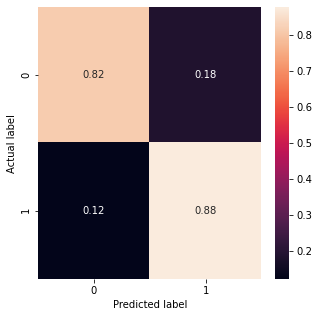

In [51]:
plot_cm(Y_test, test_predictions)

In [15]:
print(classification_report(Y_test, test_predictions))

              precision    recall  f1-score   support

           0       0.92      0.82      0.86     34204
           1       0.73      0.88      0.80     19695

    accuracy                           0.84     53899
   macro avg       0.83      0.85      0.83     53899
weighted avg       0.85      0.84      0.84     53899



In [16]:
from sklearn.metrics import roc_curve, auc

c:\users\sharuka thirimanne\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


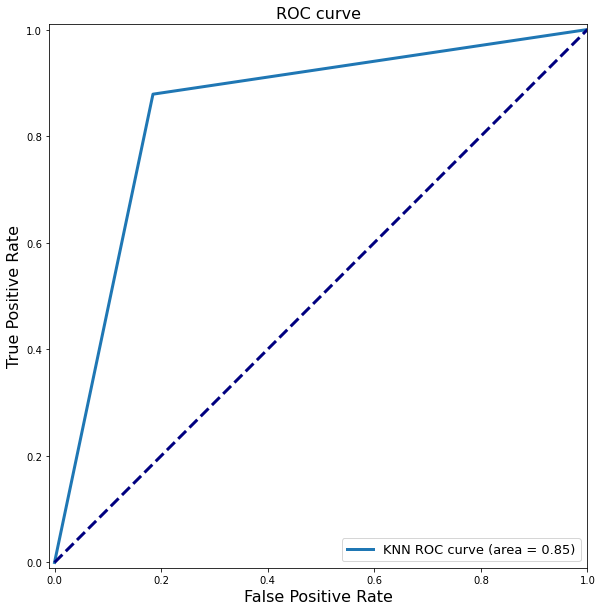

In [17]:
fpr_lr, tpr_lr, _ = roc_curve(Y_test, test_predictions)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='KNN ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

In [17]:
x = pd.DataFrame(X_train)

In [18]:
y = pd.DataFrame(Y_train)
y.reset_index(drop=True,inplace=True)

In [19]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
y['label'] = y['label'].map( {0:'normal', 1:'anomaly'} )
finalDf = pd.concat([principalDf, y], axis = 1)

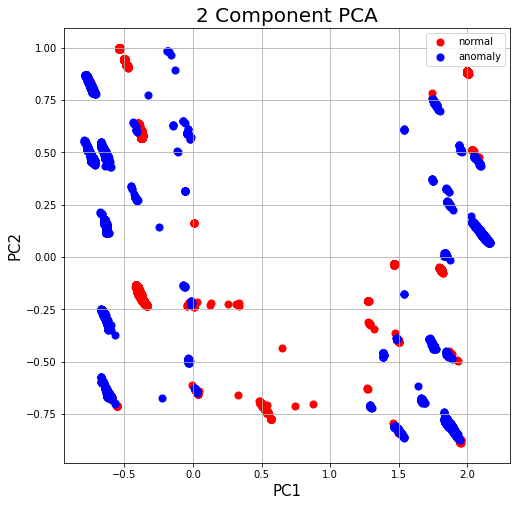

In [20]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['normal', 'anomaly']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1'], 
                  finalDf.loc[indicesToKeep, 'PC2'],  
                  c = color, 
                  s = 50)
ax.legend(targets)
ax.grid()